/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:46: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=10000,center=False).sum()


8.74645104805
0.0271027348127


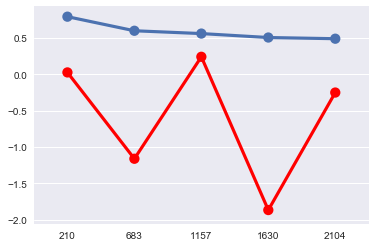

In [228]:
import pandas as pd
import seaborn as sns

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
test_ids = test['ID']
answer = train.y
train = train.drop('y', axis=1)
complete = pd.concat([train, test])

complete = complete.select_dtypes(include=['int64'])
# complete = complete.drop('ID', axis=1)

columns = ['X118', 'X119', 'X136', 'X232', 'X263', 'X279', 'X314', 'X315']
complete = complete[columns]

train = complete.head(len(train))
test = complete.tail(len(test))

from sklearn.linear_model import ARDRegression, BayesianRidge, \
    ElasticNet, HuberRegressor, Lars, Lasso, LassoLars, LassoLarsIC, LinearRegression, \
    OrthogonalMatchingPursuit, PassiveAggressiveRegressor, RANSACRegressor, SGDRegressor, \
    TheilSenRegressor, Ridge

from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.cross_decomposition import CCA, PLSCanonical, PLSRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import numpy as np

model = GradientBoostingRegressor()
predictions = cross_val_predict(model, train, answer, cv=5)

report = train.copy()
report['expected'] = answer
report['actual'] = predictions
report['diff'] = np.abs(report.expected - report.actual).round(0)
report['underestimated'] = report['actual'] < report['expected']
report['metrics_effect'] = ((answer - predictions) ** 2) / np.sum((answer - np.mean(answer)) ** 2)
report = report.sort_values('diff')
report['sum'] = pd.rolling_sum(report['metrics_effect'], window=10000, min_periods=1)
print mean_absolute_error(answer, predictions)
print r2_score(answer, predictions)

train_sizes, train_scores, test_scores = learning_curve(model, train, answer, cv=2)

data = { 'x': train_sizes, 'y': map(lambda x: np.mean(x), train_scores) }
sns.pointplot(x='x', y='y', data=data)

data = { 'x': train_sizes, 'y': map(lambda x: np.mean(x), test_scores) }
sns.pointplot(x='x', y='y', data=data, color='red')

In [193]:
pd.options.display.max_rows = 2000
report[['expected', 'actual', 'diff', 'underestimated', 'metrics_effect', 'sum']].tail(2000)

,expected,actual,diff,underestimated,metrics_effect,sum
1806,100.27,104.864320,5.0,False,0.000031,0.031111
702,108.68,113.697843,5.0,False,0.000037,0.031149
287,89.59,94.971465,5.0,False,0.000043,0.031191
1835,90.11,95.224126,5.0,False,0.000039,0.031230
283,108.31,113.697843,5.0,False,0.000043,0.031273
1267,98.95,104.360041,5.0,False,0.000043,0.031316
281,89.94,95.254795,5.0,False,0.000042,0.031358
1263,99.24,104.360041,5.0,False,0.000039,0.031397
1262,90.13,95.234361,5.0,False,0.000039,0.031435
273,99.56,104.584722,5.0,False,0.000037,0.031473


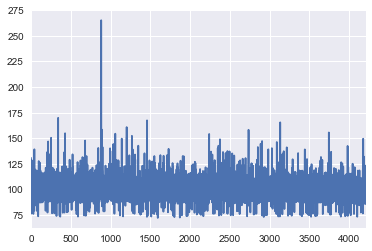

In [206]:
report['ID'] = report.index.values
report['expected'].sort_index().plot(use_index=True)

In [222]:
report[report['diff'] > 10].metrics_effect.sum()


# 8% of the data, generate 54% the error metrics

0.29944424300012973

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

# def plot_boxes(cols, dato):
#     return map(lambda x: sns.boxplot(x='answer', y=x, data=dato, ax=plt.figure().add_subplot(111)), cols)

# [
#     sns.pairplot(knn_report[knn_report['predicted'] == knn_report['expected']], hue='expected', markers='+', plot_kws={'s': 1 }),
#     sns.pairplot(rr_report[rr_report['predicted'] == rr_report['expected']], hue='expected', markers='+', plot_kws={'s': 1 })
# ]

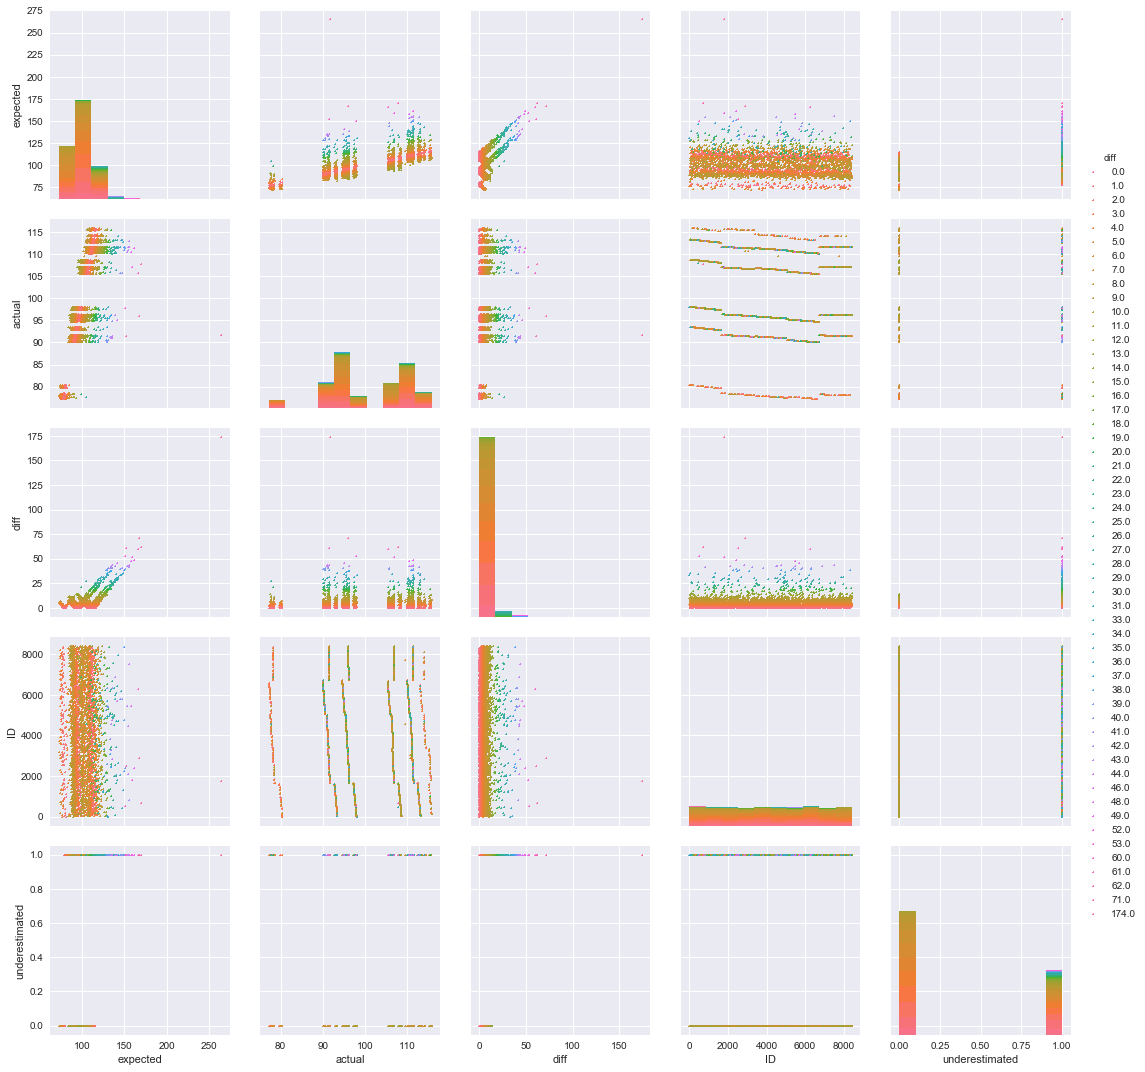

In [116]:
sns.pairplot(report[['expected', 'actual', 'diff', 'ID', 'underestimated']], markers='+', hue='diff', plot_kws={'s': 1}, size=3)

In [173]:
report[report['diff'] > 10]

,X118,X119,X136,X232,X263,X279,X314,X315,expected,actual,diff,underestimated
0,1,1,1,0,1,0,0,0,130.81,94.225896,37.0,True
6,0,0,1,0,1,0,0,0,128.76,94.022137,35.0,True
9,1,1,1,0,1,0,1,0,126.99,112.806646,14.0,True
12,0,0,1,0,1,0,0,0,82.62,94.022137,11.0,False
16,0,0,1,0,1,0,0,0,106.10,94.022137,12.0,True
17,0,0,1,0,1,0,1,0,114.13,103.475841,11.0,True
29,1,1,1,0,1,0,1,0,128.19,112.806646,15.0,True
33,1,1,1,0,1,0,0,0,104.85,94.225896,11.0,True
43,1,1,1,0,1,0,1,0,139.20,112.806646,26.0,True
69,0,0,1,0,1,0,1,0,118.24,103.475841,15.0,True


In [168]:
import time

model.fit(train, answer)
predictions = model.predict(test)

submission_response = pd.DataFrame({
    'ID': test_ids, #test['ID'],
    'y': predictions
})

timestr = time.strftime("%Y%m%d_%H%M")
pd.DataFrame(submission_response).to_csv('./outputs/naive.' + timestr + '.csv', header=True, index=False, line_terminator="\n")
pd.DataFrame(submission_response).to_csv('./outputs/_naive.latest.csv', header=True, index=False, line_terminator="\n")

In [176]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')


train.X3.unique()

array(['a', 'e', 'c', 'f', 'd', 'b', 'g'], dtype=object)